In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['target'] = data.target

In [3]:
iris['target'] = iris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
X = iris.drop('target', axis=1)
y = iris['target']

In [6]:
iris['target'].value_counts()

target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = clf.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score : {accuracy:.2f}')

Accuracy Score : 0.97


In [13]:
matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix :\n {matrix}')

Confusion Matrix :
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [14]:
report = classification_report(y_test, y_pred)
print(f'Classification Report :\n {report}')

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



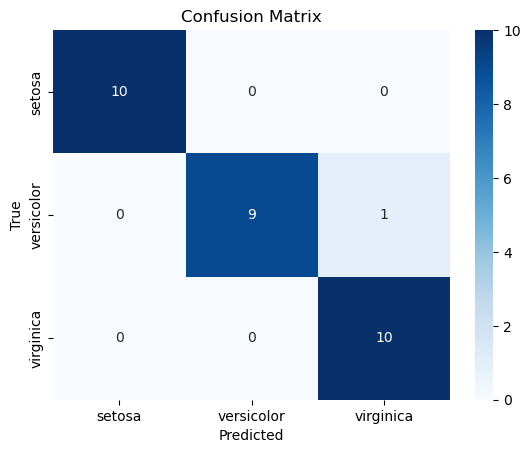

In [15]:
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

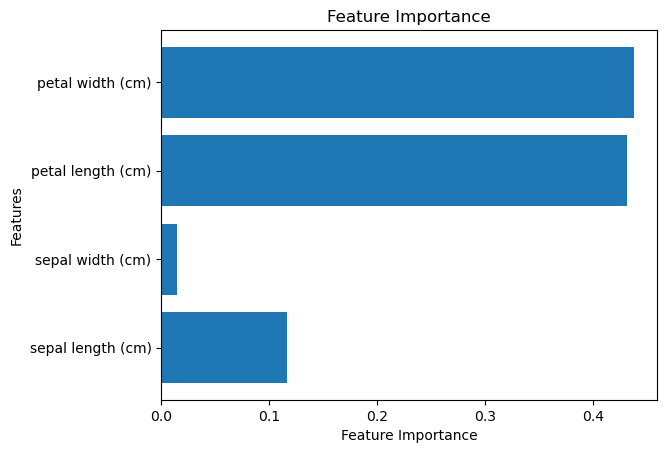

In [16]:
importances = clf.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [17]:
import joblib
import os
os.chdir("D:\MyProjects\Models")
print(os.getcwd())
joblib.dump(clf, 'iris_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

D:\MyProjects\Models


['scaler.pkl']